In [1]:
# all modules necessary for this nb
import os
import sys
import pickle
from collections import Counter

import numpy as np
import pylab as pl
import scipy.stats as sstats
import pandas as pd

# setting parameters for default matplotlib plots
%matplotlib inline

In [2]:
pl.style.use('fabiostyle')

In [3]:
# needs to find the library of functions
sys.path.append('../../../code/')  # to be replaced!

import utils as ut
import plots as pt

In [4]:
NOTEBOOK_NAME = 'run_corr'

In [5]:
from pickleshare import PickleShareDB

autorestore_folder = os.path.join(os.getcwd(), 'autorestore', NOTEBOOK_NAME)
db = PickleShareDB(autorestore_folder)
import sys
from workspace import *
import IPython
ip = IPython.get_ipython()

# this will restore all the saved variables. ignore the errors listed.
load_workspace(ip, db)

# use `save_worspace(db)` to save variables at the end

Unable to restore variable 'add_significance', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)
Unable to restore variable 'calc_rho', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)
Unable to restore variable 'extract_single_cycle_signal', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)
Unable to restore variable 'filter_cycle', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)
Unable to restore variable 'plot_it', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)


In [6]:
#this will cause text to be exported as 'true text' which can be edited in Adobe Illustrator
pl.rcParams['pdf.fonttype']=42
pl.rcParams['ps.fonttype']=42

In [264]:
#post data only
vhpc_animals = 'c18m9','vNAc7','99b','94', '94b', '96', '100', '98', '98b', '99', '104', '104b'
vhpc_high_performing_animals = '94','94b','96','98b','99b','99','100','vNAc7','c18m9'
dhpc_animals = 'dhpc40', 'dhpc40b' ,'dhpc37', 'dhpc39', 'dNAc3'
high_performing_animals = 'dhpc37','dhpc39','dNAc3'

all_animals = vhpc_animals + dhpc_animals
print all_animals

('c18m9', 'vNAc7', '99b', '94', '94b', '96', '100', '98', '98b', '99', '104', '104b', 'dhpc40', 'dhpc40b', 'dhpc37', 'dhpc39', 'dNAc3')


In [278]:
speed_interp_vhpc = {}
for ani in vhpc_animals: 
    for var in 'speed', 'speed_times','time_ax','cycles_ends','cycles_starts','cycles','events','STIM5_ons','STIM6_ons','STIM7_ons',:
        exec("%s_vhpc['%s'] = ut.load_variable('%s', '../%s/post/notebooks/autorestore/preprocessing')"%(var, ani, var, ani))
    exec("speed_interp_vhpc['%s'] = np.interp(time_ax_vhpc['%s'],speed_times_vhpc['%s'],speed_vhpc['%s'])"%(ani,ani,ani,ani))
speed_interp_dhpc = {}
for ani in dhpc_animals: 
    for var in 'speed', 'speed_times','time_ax','cycles_ends','cycles_starts','cycles','events','STIM5_ons','STIM6_ons','STIM7_ons',:
        exec("%s_vhpc['%s'] = ut.load_variable('%s', '../%s/post/notebooks/autorestore/preprocessing')"%(var, ani, var, ani))
    exec("speed_interp_dhpc['%s'] = np.interp(time_ax_vhpc['%s'],speed_times_vhpc['%s'],speed_vhpc['%s'])"%(ani,ani,ani,ani))

In [279]:
def extract_single_cycle_signal(time_ax, signal, cycles, cycle, sample_start=7,sample_end=11):
    fc = filter_cycle(time_ax, cycles, cycle)
    t0 = time_ax[fc][0]
    return time_ax[fc] - t0, signal[fc][sample_start:sample_end]

In [280]:
def filter_cycle(time_ax, cycles, cycle):
    return (time_ax>=cycles[cycle][0]) * (time_ax<cycles[cycle][1])

In [376]:
k={}
for i in range(120):
    fc = filter_cycle(time_ax_dhpc['dhpc40'],cycles_dhpc['dhpc40'],i)
    k[i]=events_dhpc['dhpc40'][fc][16:29]
len(k)

120

In [381]:
len(k[0][0])

431

In [427]:
from itertools import chain

ev_vhpc={}
speed_bin_vhpc={}

for ani in vhpc_animals:
    exec("ev_vhpc['%s']=[]"%(ani))
    exec("speed_bin_vhpc['%s']=[]"%(ani))
    for i in range(120):
        exec("a,temp_ev = extract_single_cycle_signal(time_ax_vhpc['%s'],events_vhpc['%s'],cycles_vhpc['%s'],i,16,29)"%(ani,ani,ani))
        exec("ev_vhpc['%s'].append(temp_ev)"%(ani))
        exec("a,temp_speed = extract_single_cycle_signal(time_ax_vhpc['%s'],speed_interp_vhpc['%s'],cycles_vhpc['%s'],i,16,29)"%(ani,ani,ani))
        exec("speed_bin_vhpc['%s'].append(temp_speed)"%(ani))
    exec("t_list = [x.tolist() for x in speed_bin_vhpc['%s']]"%(ani))
    exec("speed_bin_vhpc['%s'] = list(chain(*t_list))"%(ani))
    exec("ev_vhpc['%s'] = [x for xs in ev_vhpc['%s'] for x in xs]"%(ani,ani))
    
ev_dhpc={}
speed_bin_dhpc={}

for ani in dhpc_animals:
    exec("ev_dhpc['%s']=[]"%(ani))
    exec("speed_bin_dhpc['%s']=[]"%(ani))
    for i in range(120):
        exec("a,temp_ev = extract_single_cycle_signal(time_ax_dhpc['%s'],events_dhpc['%s'],cycles_dhpc['%s'],i,16,29)"%(ani,ani,ani))
        exec("ev_dhpc['%s'].append(temp_ev)"%(ani))
        exec("a,temp_speed = extract_single_cycle_signal(time_ax_dhpc['%s'],speed_interp_dhpc['%s'],cycles_dhpc['%s'],i,16,29)"%(ani,ani,ani))
        exec("speed_bin_dhpc['%s'].append(temp_speed)"%(ani))
    exec("ev_dhpc['%s'] = [x for xs in ev_dhpc['%s'] for x in xs]"%(ani,ani))
    exec("t_list = [x.tolist() for x in speed_bin_dhpc['%s']]"%(ani))
    exec("speed_bin_dhpc['%s'] = list(chain(*t_list))"%(ani))

In [454]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import cross_val_score, LeaveOneGroupOut
from matplotlib.lines import Line2D

In [455]:
def calc_rho(events,speed,animal):
    exec("events = events['%s']"%(animal))
    exec("speed = speed['%s']"%(animal))
    scores=[]
    lr = Lasso()
    cv = LeaveOneGroupOut()
    n_chunks=10
    groups = np.repeat(np.arange(n_chunks), len(events)/n_chunks+1)[:len(events)]
    scores.append(cross_val_score(lr, events, speed,
                                              cv=10))
    scores=np.mean(scores)
    return scores

In [456]:
rhos_vhpc = [calc_rho(ev_vhpc,speed_bin_vhpc,animal) for animal in vhpc_animals]
rhos_dhpc = [calc_rho(ev_dhpc,speed_bin_dhpc,animal) for animal in dhpc_animals]

In [457]:
def plot_it(ax, xpos, values, color='k', errs=False):
    vals = [[vv for vv in v if vv>-1e10] for v in values]
    [ax.plot(np.random.rand(len(v))*0.2+x-0.1, v, 'o', mew=0.5, mfc=(0,0,0,0), mec=color, ms=2)
     for x, v in zip(xpos, vals)]
    m = [np.mean(v) for v in vals]
    s = [sstats.sem(v) for v in vals]
    ax.plot(xpos, m, '_', ms=8, lw=0.5, color=color)
    if errs:        
        ax.errorbar(xpos, m, s, lw=0, elinewidth=0.5, color=color)
        

In [458]:
def add_significance(ax, array1, array2, x1, x2, y, ticksize=0.02, sig_func=None, thresholds=(0.05, 0.01, 0.001)):
    if sig_func is None:
        sig_func = lambda x, y: sstats.ttest_ind(x, y)
    p = sig_func(array1, array2)[-1]
    sig_value = sig_func(array1, array2)[0]
    deltay = np.diff(ax.axis()[-2:])*ticksize
    line = Line2D([x1, x1, x2, x2], [y-deltay, y, y, y-deltay], lw=1, color='k', clip_on=False)
    ax.add_line(line)
    ax.text(np.mean([x1, x2]), y+deltay,
            'n.s.' if p>thresholds[0] else
            '*' if p>thresholds[1] else
            '**' if p>thresholds[2] else
            '***',
            ha='center', fontsize=5)
    return sig_value, p

In [7]:
def report_stats (array1, array2, sig_func=None,mcc=1):
    if sig_func is None:
        sig_func = lambda x, y: sstats.mannwhitneyu(x, y, alternative='two-sided')
        U = sig_func(array1, array2)[0]
        z = ((U-((loops*loops)/2))/(np.sqrt(((loops*loops)*(loops+loops+1))/12)))
        r = z/np.sqrt(loops*2)
        p = sig_func(array1, array2)[-1]
        print "U =",U,"p =",p*mcc,"r =",r
    if sig_func is 'ttest':
        sig_func = lambda x, y: sstats.ttest_ind(x, y)
        cohens_d = (np.mean(array1)-np.mean(array2))/np.sqrt((np.std(array1)**2+np.std(array2)**2)/2)
        p = sig_func(array1, array2)[-1]
        print sig_func(array1, array2),"d =", cohens_d, 'corrected p =',p*mcc
    if sig_func is 'fishers':
        table = array1,array2
        sig_func = lambda x: sstats.fisher_exact(x, alternative='two-sided')
        p = sig_func(table)[-1]
        odds_ratio = sig_func(table)[0]
        print sig_func(table),"odd's ratio =", odds_ratio, 'corrected p =',p*mcc
        

def report_stats_chance (array1, chance=0.5, sig_func=None,mcc=1):
    if sig_func is None:
        sig_func = lambda x: sstats.wilcoxon(x)
        subtracted = [x-chance for x in array1]
        U = sig_func(subtracted)[0]
        z = ((U-((loops*loops)/2))/(np.sqrt(((loops*loops)*(loops+loops+1))/12)))
        r = z/np.sqrt(loops*2)
        print sig_func(subtracted),"r =",r
    elif sig_func is 'ttest':
        sig_func = lambda x, y: sstats.ttest_1samp(x,y)
        cohens_d = (np.mean(array1)-chance)/np.std(array1)
        print sig_func(array1,chance),"d =",cohens_d

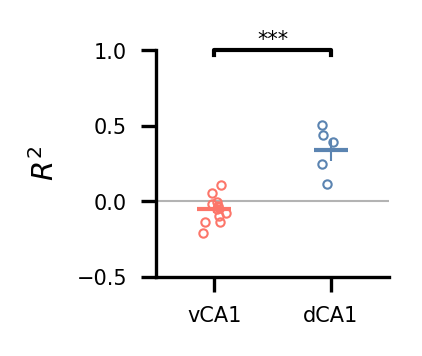

In [463]:
fig, ax = pl.subplots(1, 1, figsize=(1., 1), sharex=True, sharey=True)

values_vhpc =  np.r_[rhos_vhpc]
values_dhpc =  np.r_[rhos_dhpc]

plot_it(ax, [0], [values_vhpc], color='#FC766AFF',errs=True)
plot_it(ax, [1], [values_dhpc], color='#5B84B1FF', errs=True)
ax.set_ylim(-0.5, 1)
ax.set_xlim(-0.5, 1.5)

ax.set_xticks(np.arange(2))
ax.set_xticklabels(['vCA1', 'dCA1'])

ax.set_ylabel(r'$R^2$')

#ax.legend([Line2D('', '', color=c, lw=.5) for c in 'k', 'r'], ['Early', 'Late'])

# axs[0].text(1, 0.5, u"☆", fontsize=5, color='r', ha='center')

ax.hlines(0, -0.5, 1.5, color='0.7')

pvs = []
pvs.append(add_significance(ax, values_vhpc, values_dhpc, 0, 1, 1))


#fig.tight_layout()
fig.savefig('../figures/%s_Rsqu.pdf'%NOTEBOOK_NAME)

In [11]:
values_vhpc =  np.r_[rhos_vhpc]
values_dhpc =  np.r_[rhos_dhpc]
report_stats(values_vhpc,values_dhpc,sig_func='ttest')

Ttest_indResult(statistic=-6.6826178905193405, pvalue=7.3200408679722307e-06) d = -3.37840533443 corrected p = 7.32004086797e-06


In [10]:
values_vhpc

array([-0.09431797, -0.03313903, -0.03934337, -0.07613127, -0.0205899 ,
       -0.13428789, -0.13453237, -0.00738177, -0.21178703, -0.04959706,
        0.10914292,  0.05252664])

In [460]:
save_workspace(db)

Could not store variable 'IPython'. Skipping...
Could not store variable 'sstats'. Skipping...
Could not store variable 'pickle'. Skipping...
Could not store variable 'pt'. Skipping...
Could not store variable 'pd'. Skipping...
Could not store variable 'pl'. Skipping...
Could not store variable 'ip'. Skipping...
Could not store variable 'sys'. Skipping...
Could not store variable 'os'. Skipping...
Could not store variable 'ut'. Skipping...
Could not store variable 'np'. Skipping...
